# **1. Dataset Information**


The dataset used is about **Loan Approval Classification Dataset**, we can get the dataset via [this link](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data).

As the author said, this dataset is a syntethic version of the original credit risk dataset on Kaggle, that was enriched with additional variables based on [Financial Risk for Loan Approval data](https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval) using SMOTENC technique.

Total rows is 45000, with 14 columns. Here's the variable description:

| Column | Description | Type |
| -- | -- | -- |
| person_age	| Age of the person	 | Float |
| person_gender	| Gender of the person	| Categorical |
| person_education	| Highest education level	| Categorical |
| person_income	| Annual income	| Float |
| person_emp_exp	| Years of employment experience	| Integer |
| person_home_ownership	| Home ownership status (e.g., rent, own, mortgage) | Categorical |
| loan_amnt	| Loan amount requested	| Float |
| loan_intent	| Purpose of the loan	| Categorical |
| loan_int_rate	| Loan interest rate	| Float |
| loan_percent_income	| Loan amount as a percentage of annual income	| Float |
| cb_person_cred_hist_length	| Length of credit history in years	| Float |
| credit_score	| Credit score of the person	| Integer |
| previous_loan_defaults_on_file	| Indicator of previous loan defaults	|Categorical |
| loan_status (target variable)	| Loan approval status: 1 = approved; 0 = rejected	| Integer |


# **2. Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# **3. Dataset Loading**

In [ ]:
df = pd.read_csv("./loan_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
0


- The dataset is already clean, it doesn't have missing values and duplictaes values.
- Across 13 predictor variables, 8 columns are numerical (consist of float and integer)

# **4. Exploratory Data Analysis (EDA)**

### 4.1 Distribution & Correlation Analysis

In [ ]:
# numerical feature summary stats

df.select_dtypes(include=['float64', 'int64']).describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


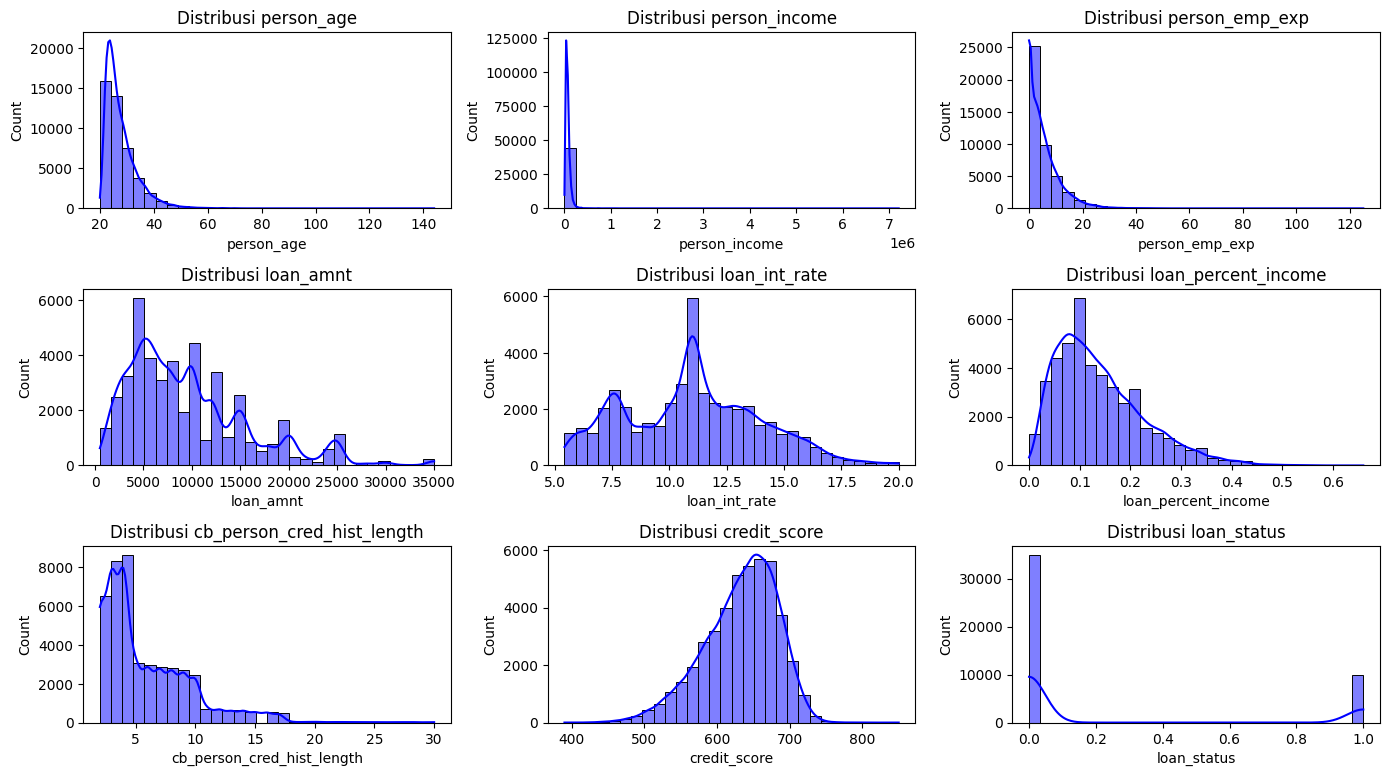

In [ ]:
# numerical features distribution

plt.figure(figsize=(14, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

**Interpretation of numerical features summary stats & distribution**
- There are applicants with **age** more than 100 years old, the maximum old is 144. It doesn't make sense for people with this age range applying for a loan.
- Majority of **incomes** are clustered below 500,000, with some extreme outliers up to 7,000,000. These high values might need checking for data entry errors or may require log transformation.
- Most applicants have less than 20 **years of experience**. There are very few with experience over 60 years, which is unusual and may also indicate outliers or data quality issues.
- Common **loan amounts** range between 2,000 and 10,000. Peaks around 5,000 and 10,000 suggest standard or preferred loan tiers. Some applicants request over 30,000.
- **Interest rates** range from ~5% to 20%, with peaks around 7%, 10%, and 12% interest rates. It indicates different rate bands or possibly different loan categories/products.
- Most applicants request loans that are less than 20% of their income. Very few request over 50%, which may be high-risk.
- Most people have a **credit history** of under 10 years, with a sharp decline afterward. Some outliers go beyond 25 years.
- **Credit score** mean appears around 600–650, which falls into a fair credit range. A bell-shaped curve suggests a relatively balanced distribution.
- For **target variable**, most values are 0, meaning loans were rejected. Fewer 1s indicate approvals. This class imbalance may affect model performance and needs to be handled.

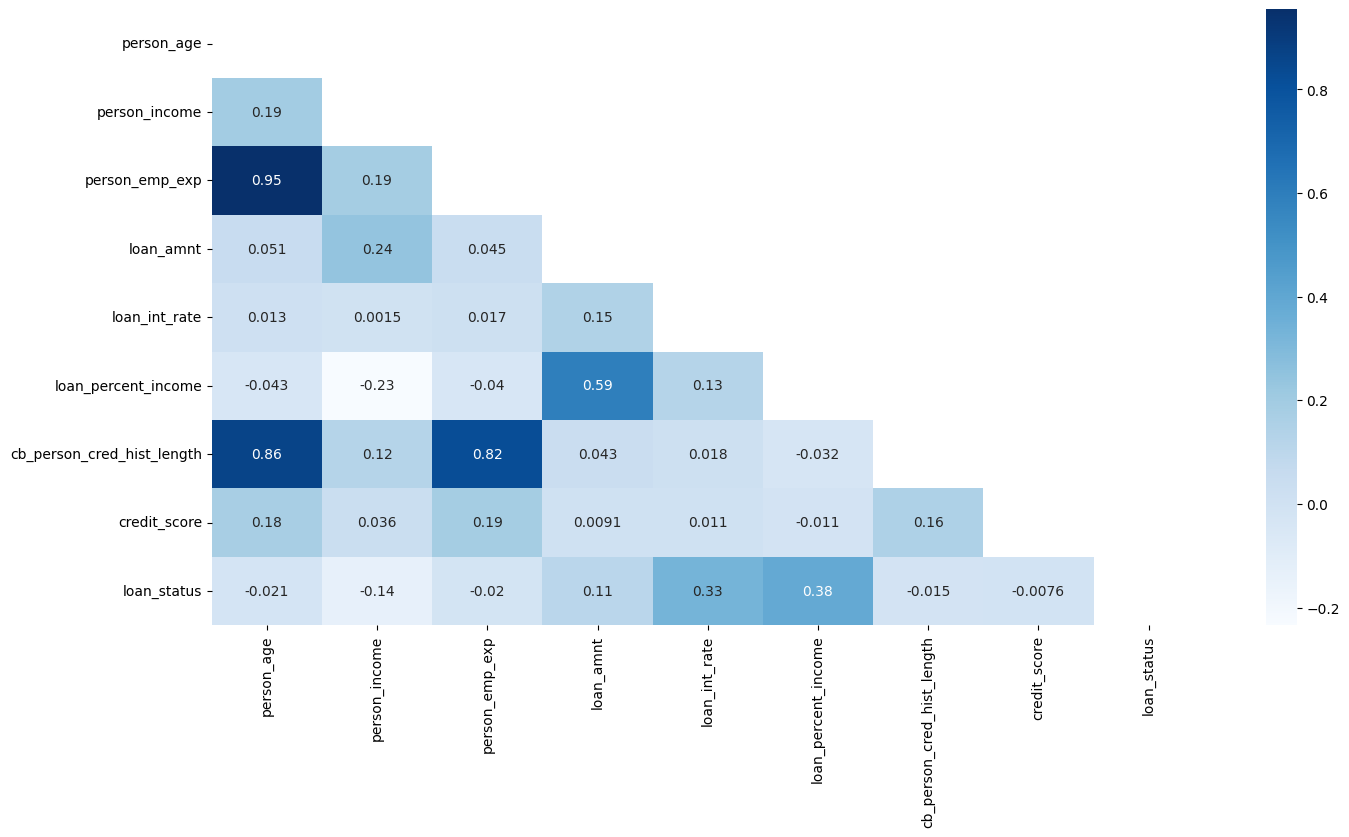

In [ ]:
# numerical features correlation

corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(16,8))

# masking the upper triangle part (since matrix is repetitive)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Blues", annot=True)
plt.show()

**Correlation plot interpretation**

- `person_age` and `cb_person_cred_hist_length`: 0.86

Older individuals tend to have longer credit histories.

- `cb_person_cred_hist_length` and `loan_amnt`: 0.82

People with longer credit histories tend to apply for larger loan amounts. This may suggest that lenders offer more to people with longer histories.

- `loan_int_rate` and `loan_status`: 0.33

Higher interest rates are moderately correlated with loan approval. Higher-risk applicants may still get loans but with higher rates, or lenders may be compensating risk with higher rates.

- `person_income` and `loan_status`: -0.14

Slight negative correlation, indicating that higher income is not strongly associated with approval. This could reflect more conservative lenders toward high-income applicants with large loan requests.

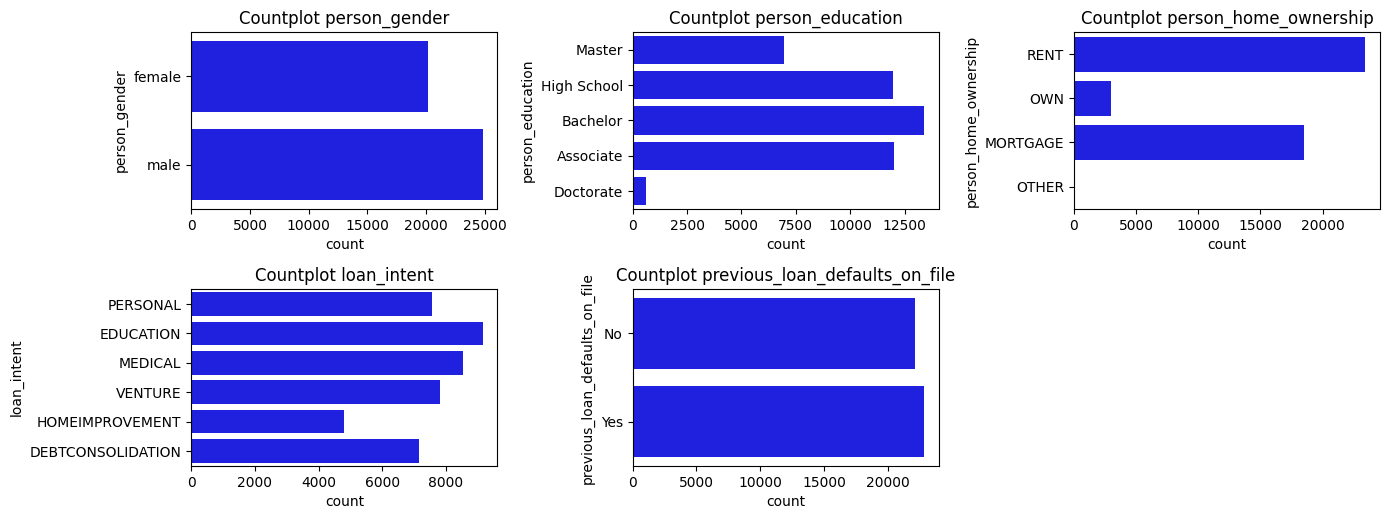

In [ ]:
# countplot fitur kategorik

plt.figure(figsize=(14, 10))
for i, column in enumerate(df.select_dtypes(include=['object']).columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=df[column], color='blue')
    plt.title(f'Countplot {column}')
plt.tight_layout()
plt.show()

**Interpretation of count plot**
- RENT is the most common status, followed by MORTGAGE. OWN is surprisingly low, which might indicate that a large portion of applicants do not yet own a home outright—potentially affecting loan decisions or risk assessments.
- The count of applicants who have defaulted before ("Yes") is nearly the same as those who have not ("No"). This is significant: a large portion of applicants are not first-time defaulters, which could heavily influence approval strategies.
- Bachelor's and Associate degree holders dominate the dataset. Very few applicants hold a Doctorate, and even Master’s degrees are relatively underrepresented—this could influence how education level is weighted in approval models.


Interestingly, the most common purpose of applicants borrowing money is for education, followed by medical purposes. The least was borrowing for home improvements.
- Education loans often involve younger applicants or those with lower current income, potentially with limited credit history — posing a higher short-term risk but potential long-term gain (if education leads to better employment).
- Medical loans may be linked to urgent or unplanned expenses, and could be associated with financial instability or lack of insurance — possibly signaling higher risk of default.
- The low volume of home improvement loans — which are often tied to property ownership and asset enhancement — suggests fewer low-risk, asset-backed applicants in the pool.

### 4.2 Data Visualization

Here's three business questions that can enhanced our data & domain understanding:

**1. Which borrower profiles (age, income) are most associated with loan approval or rejection?**

The goal is to understand what kind of applicants are more likely to get approved or rejected.

**2. How does previous loan default history affect loan approval rates across different loan purposes?**

The objective is to determine if past default behavior influences approval decisions differently depending on the loan intent (e.g., is a defaulter more likely to get rejected for a personal loan than for a medical one?).

**3. Are there differences in loan approval rates between home ownership types (e.g., renters vs. mortgage holders)?**

We aim to explore whether housing stability (e.g., owning vs. renting) affects loan approval likelihood.

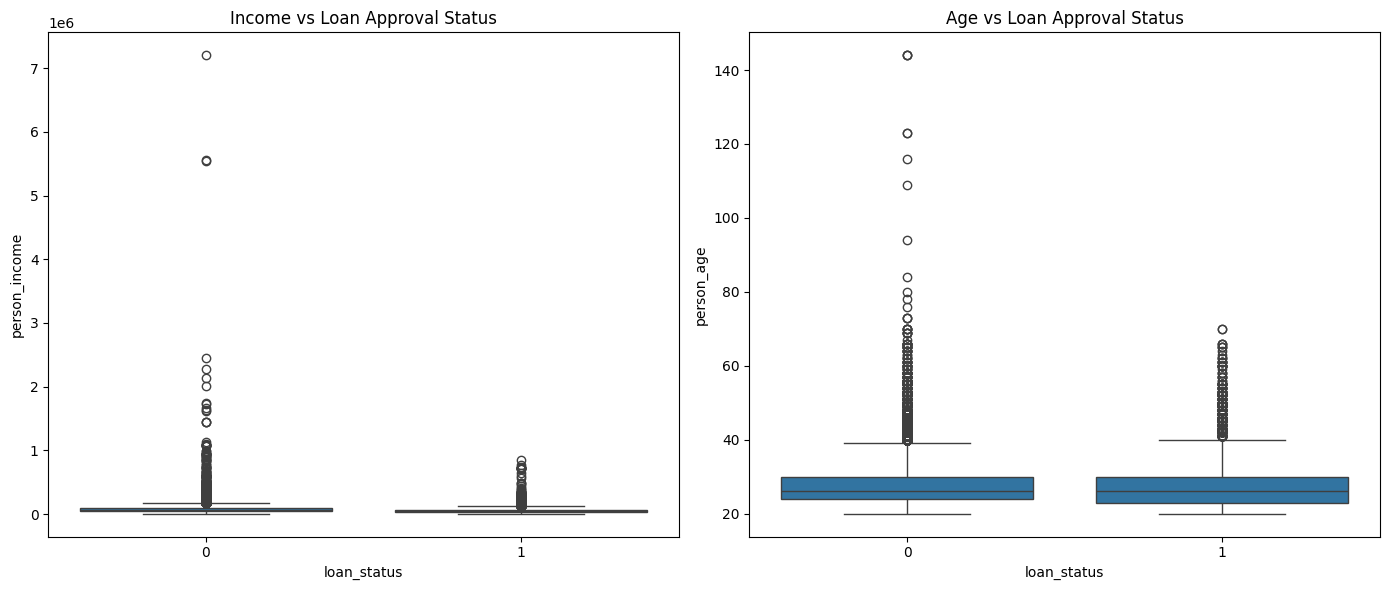

In [ ]:
# question 1
plt.figure(figsize=(14, 6))

# Income vs Loan Status
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title('Income vs Loan Approval Status')

# Age vs Loan Status
plt.subplot(1, 2, 2)
sns.boxplot(x='loan_status', y='person_age', data=df)
plt.title('Age vs Loan Approval Status')

plt.tight_layout()
plt.show()

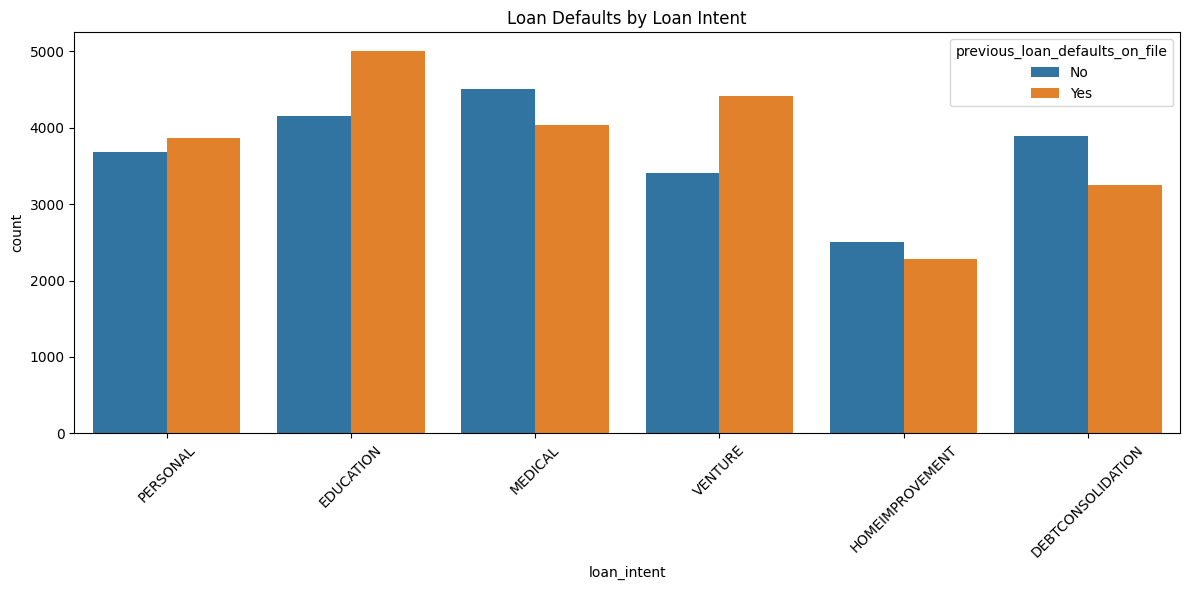

In [ ]:
# question 2

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='loan_intent', hue='previous_loan_defaults_on_file')
plt.title('Loan Defaults by Loan Intent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

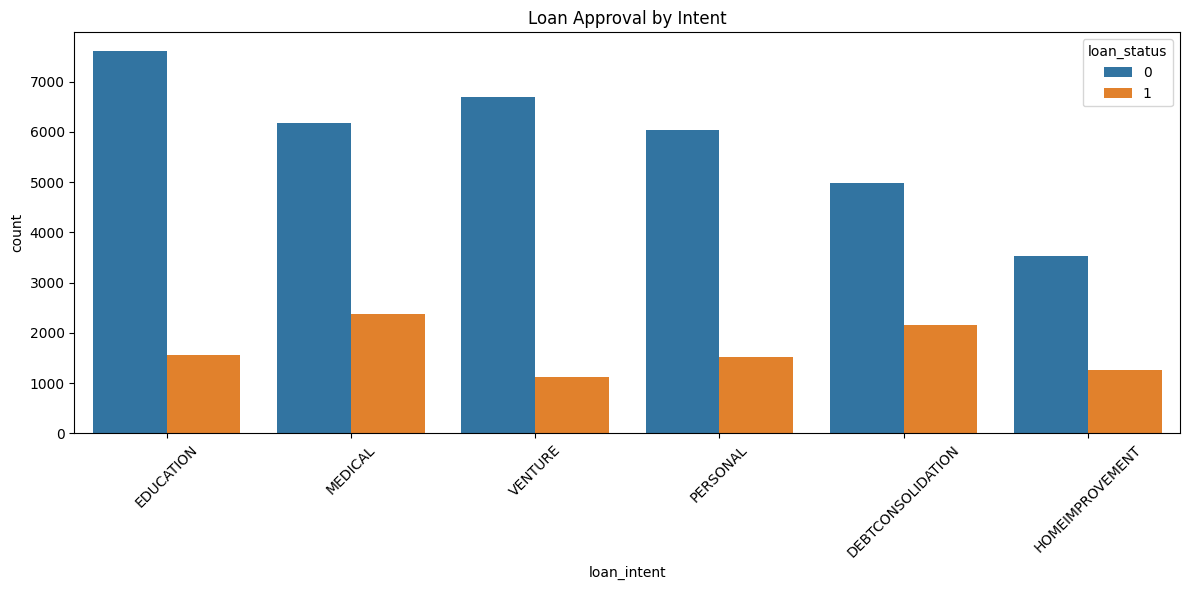

In [ ]:
# question 2

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='loan_intent', hue='loan_status',
              order=df['loan_intent'].value_counts().index)
plt.title('Loan Approval by Intent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

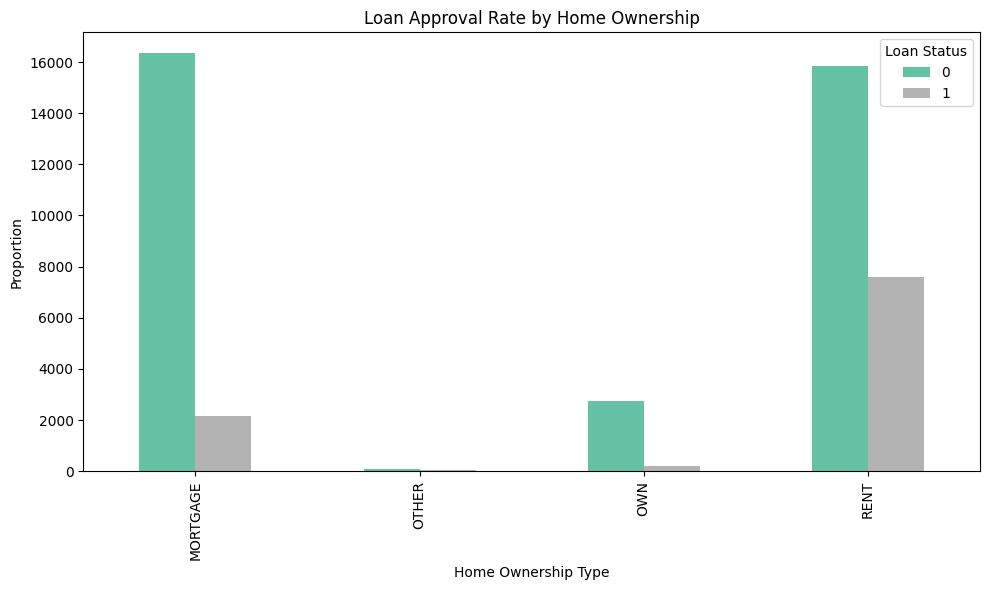

In [ ]:
# question 3

# proportions
home_approval = df.groupby(['person_home_ownership', 'loan_status']).size().unstack()

# plot
home_approval.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Loan Approval Rate by Home Ownership')
plt.ylabel('Proportion')
plt.xlabel('Home Ownership Type')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

**Business Question Answer**

**Question 1**

In this dataset, income is not strongly associated with credit receipt status. If high income makes borrowers approve loans, then the boxplot “loan applications with income > 5 million” that are rejected will not exist. The high income could also be outliers, because logically, people with high income would not borrow money. The income range whose loans are accepted in this dataset is less than 1 million.


Applicants older than 80 years old are outliers. Basically, older people will not borrow money, and borrowers will not lend money, as evidenced by the borrowers whose applications were accepted, whose ages ranged from 20 to 75 years old. Borrowers will only lend their money to those who are productive.


**Question 2**

Previous loan default history does affect loan approval rates, but its impact varies by loan purpose.
- Venture and Personal loans show stronger rejection patterns for defaulters.
- Education and Medical loans appear to be approved even for defaulters, indicating a more lenient or need-based decision-making process.


**Question 3**

Home ownership status is not associated with loan receipt status. As noted, in this dataset, rent is the most common status, followed by mortage, while own is surprisingly low. So it is difficult to know the weight of this single factor on the influence of loan acceptance status.

# **5. Data Preprocessing**

### 5.1 Outliers Check & Handling

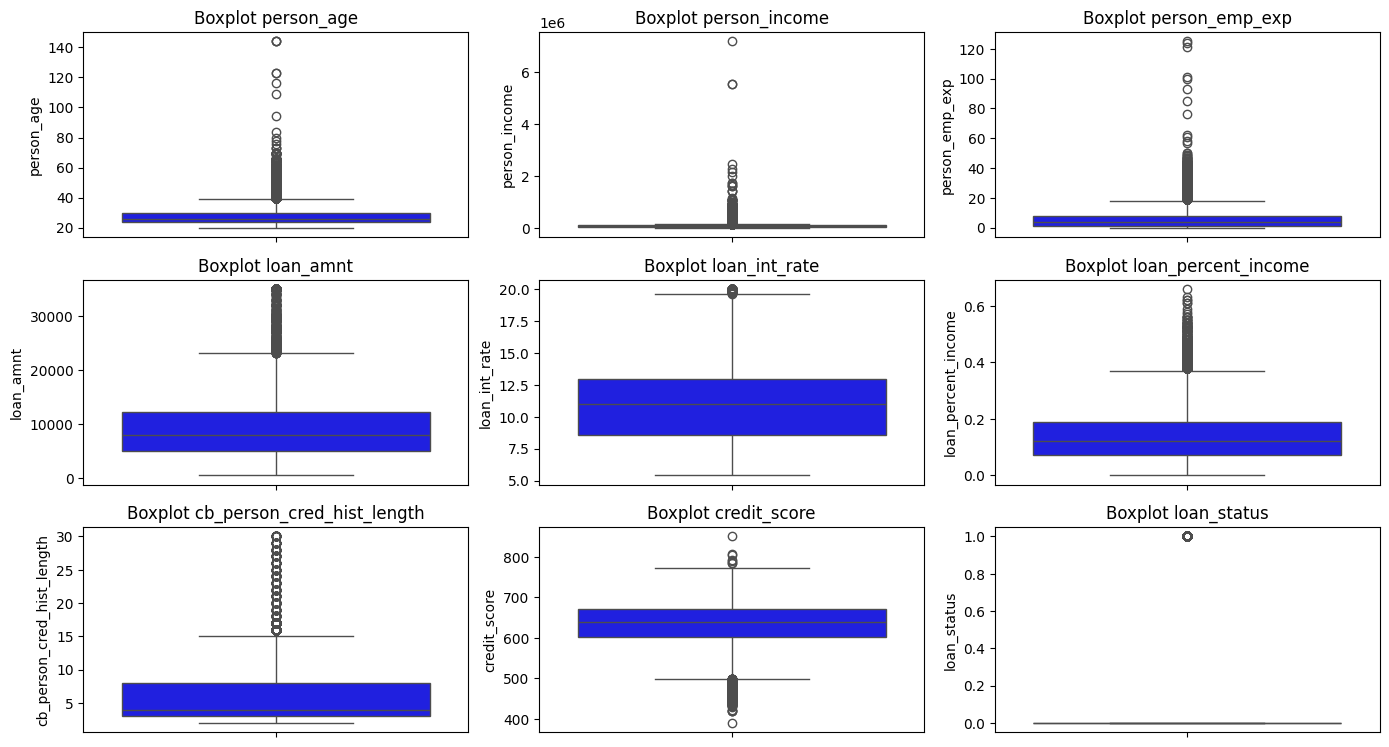

In [ ]:
# Outliers check

plt.figure(figsize=(14, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column], color='blue')
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

From EDA and boxplot above, we can handle outliers by excluding not make sense values in: `person_age`, `person_income`, `people_emp_exp`

15


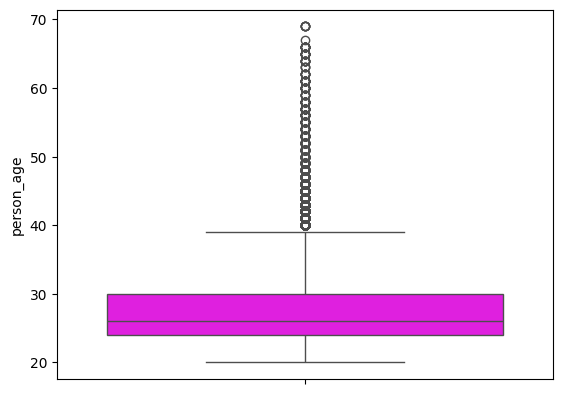

In [ ]:
print(len(df[df['person_age'] > 70]))

sns.boxplot(y=df['person_age'][df['person_age'] < 70], color='magenta')
plt.show()

1


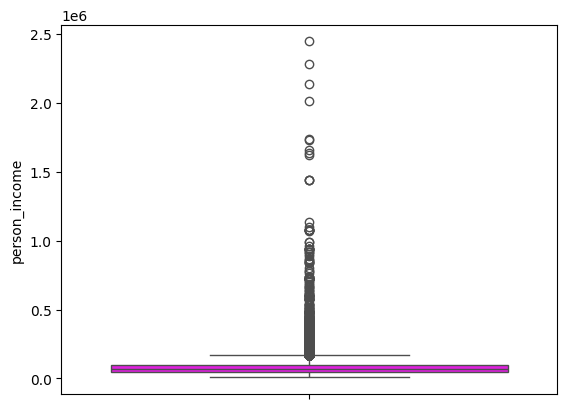

In [ ]:
print(len(df[df['person_income'] > 6000000]))

sns.boxplot(y=df['person_income'][df['person_income'] < 3000000], color='magenta')
plt.show()

65


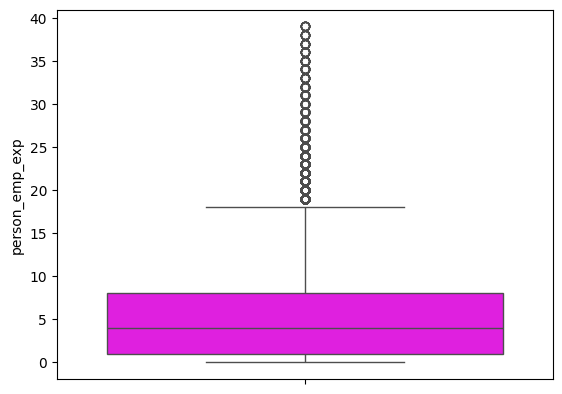

In [ ]:
print(len(df[df['person_emp_exp'] > 40]))

sns.boxplot(y=df['person_emp_exp'][df['person_emp_exp'] < 40], color='magenta')
plt.show()

In [ ]:
# exclude outliers in certain threshold
df_preprocess = df[~((df['person_age'] > 70) |
    (df['person_income'] > 3000000) |
    (df['person_emp_exp'] > 40))]
df_preprocess.shape

(44935, 14)

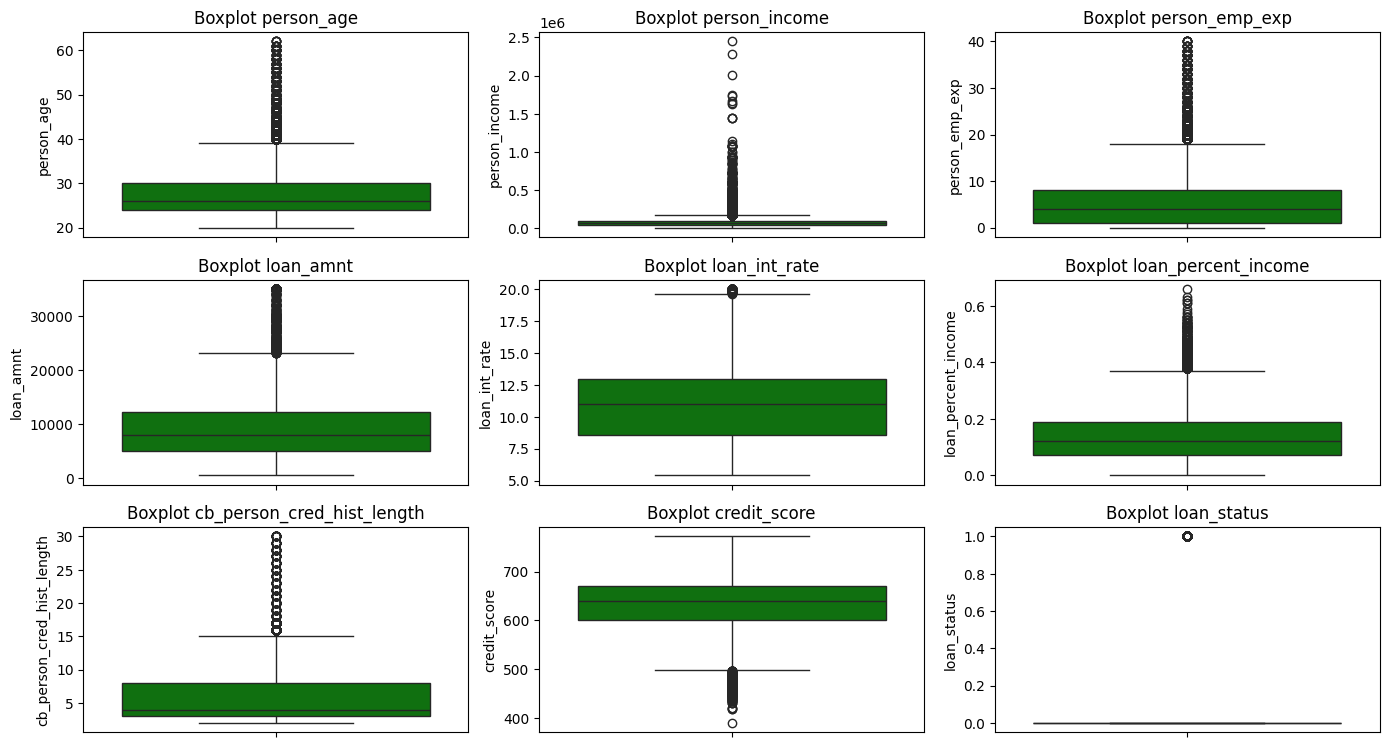

In [ ]:
# Outliers check after handling it

plt.figure(figsize=(14, 10))
for i, column in enumerate(df_preprocess.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df_preprocess[column], color='green')
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

In [ ]:
df_preprocess.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


### 5.2 Binning

We will do binning on `credit_score`. The binning rule was based on [**FICO Rule**](https://www.investopedia.com/terms/c/credit_score.asp), as follow:
- Excellent: 800–850
- Very Good: 740–799
- Good: 670–739
- Fair: 580–669
- Poor: 300–579

We will also do binning on `person_age`, following this label:
- Under 18
- 18-29
- 30-49
- 50+


In [ ]:
def binning_credit_score(credit_score):
  if credit_score >= 800 and credit_score <= 850:
    return 'Excellent'
  elif credit_score >= 740 and credit_score <= 799:
    return 'Very Good'
  elif credit_score >= 670 and credit_score <= 739:
    return 'Good'
  elif credit_score >= 580 and credit_score <= 669:
    return 'Fair'
  else:
    return 'Poor'

def binning_age(person_age):
  if person_age < 18:
    return 'Under 18'
  elif person_age >= 18 and person_age <= 29:
    return '18-29'
  elif person_age >= 30 and person_age <= 49:
    return '30-49'
  else:
    return '50+'

In [ ]:
df_preprocess.loc[:, 'credit_score_binning'] = df_preprocess.loc[:, 'credit_score'].apply(binning_credit_score)
df_preprocess.loc[:, 'person_age_binning'] = df_preprocess.loc[:, 'person_age'].apply(binning_age)

# show the result
df_preprocess.dropna(inplace=True)
df_preprocess.head()

<ipython-input-21-5d6047de3ac3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocess.loc[:, 'credit_score_binning'] = df_preprocess.loc[:, 'credit_score'].apply(binning_credit_score)
<ipython-input-21-5d6047de3ac3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocess.loc[:, 'person_age_binning'] = df_preprocess.loc[:, 'person_age'].apply(binning_age)
<ipython-input-21-5d6047de3ac3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,credit_score_binning,person_age_binning
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,Poor,18-29
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,Poor,18-29
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,Fair,18-29
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,Good,18-29
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,Fair,18-29


In [ ]:
# ensure the dtype is correct
int_cols = ['person_age', 'cb_person_cred_hist_length', 'person_emp_exp', 'loan_status']

for col in int_cols:
    df_preprocess[col] = df_preprocess[col].astype('int64')

df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44935 entries, 0 to 44999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44935 non-null  int64  
 1   person_gender                   44935 non-null  object 
 2   person_education                44935 non-null  object 
 3   person_income                   44935 non-null  float64
 4   person_emp_exp                  44935 non-null  int64  
 5   person_home_ownership           44935 non-null  object 
 6   loan_amnt                       44935 non-null  float64
 7   loan_intent                     44935 non-null  object 
 8   loan_int_rate                   44935 non-null  float64
 9   loan_percent_income             44935 non-null  float64
 10  cb_person_cred_hist_length      44935 non-null  int64  
 11  credit_score                    44935 non-null  int64  
 12  previous_loan_defaults_on_file  44935

<ipython-input-23-1e31476fc510>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocess[col] = df_preprocess[col].astype('int64')
<ipython-input-23-1e31476fc510>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocess[col] = df_preprocess[col].astype('int64')
<ipython-input-23-1e31476fc510>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

### **5. 3 Encode Categorical Data**

In [ ]:
# with label encoder
le = LabelEncoder()

for col in df_preprocess.select_dtypes(include=['object']).columns:
    df_preprocess[col] = le.fit_transform(df_preprocess[col])

<ipython-input-24-fa5c75e9205f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocess[col] = le.fit_transform(df_preprocess[col])
<ipython-input-24-fa5c75e9205f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocess[col] = le.fit_transform(df_preprocess[col])
<ipython-input-24-fa5c75e9205f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
df_preprocess.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,credit_score_binning,person_age_binning
0,22,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3,561,0,1,2,0
1,21,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2,504,1,0,2,0
2,25,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3,635,0,1,0,0
3,23,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2,675,0,1,1,0
4,24,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4,586,0,1,0,0


### 5.4 Feature Standarization

In [ ]:
std_cols = ['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'credit_score_binning', 'person_age_binning']

# initialize StandardScaler
scaler = StandardScaler()

for col in std_cols:
    df_preprocess[col] = scaler.fit_transform(df_preprocess[[col]])

<ipython-input-26-38e4e6ce742e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocess[col] = scaler.fit_transform(df_preprocess[[col]])
<ipython-input-26-38e4e6ce742e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocess[col] = scaler.fit_transform(df_preprocess[[col]])
<ipython-input-26-38e4e6ce742e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
df_preprocess.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,credit_score_binning,person_age_binning
0,-0.993444,-1.109264,1.525018,-0.126325,-0.929821,0.905135,4.027893,0.853044,1.683160,4.017007,-0.743996,-1.419973,-1.016719,1,1.915502,-0.612823
1,-1.167819,-1.109264,0.849046,-1.079773,-0.929821,0.210927,-1.359573,-0.882383,0.044941,-0.684928,-1.005711,-2.552026,0.983556,0,1.915502,-0.612823
2,-0.470318,-1.109264,0.849046,-1.077280,-0.407672,-1.177489,-0.646526,0.274569,0.625703,3.443600,-0.743996,0.049710,-1.016719,1,-0.746703,-0.612823
3,-0.819069,-1.109264,-0.502899,-0.001603,-0.929821,0.905135,4.027893,0.274569,1.417957,3.443600,-1.005711,0.844134,-1.016719,1,0.584399,-0.612823
4,-0.644693,0.901498,1.525018,-0.219215,-0.755772,0.905135,4.027893,0.274569,1.095684,4.475732,-0.482281,-0.923458,-1.016719,1,-0.746703,-0.612823


### 5.5 Splitting Data

In [ ]:
# split X and Y
X = df_preprocess.drop(columns=['person_age', 'credit_score', 'loan_status'], axis=1)
y = df_preprocess['loan_status']

print(X.shape, y.shape)

# split data into train and test set 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_test: {y_test.shape}')

(44935, 13) (44935,)
shape of X_train: (33701, 13)
shape of y_train: (33701,)
shape of X_test: (11234, 13)
shape of y_test: (11234,)


In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# save the train and test set
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)